In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

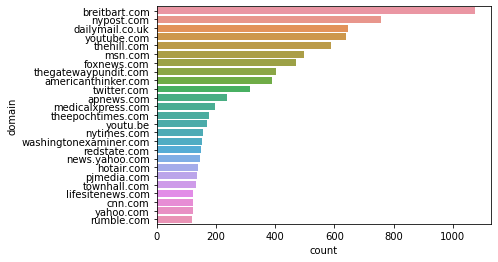

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

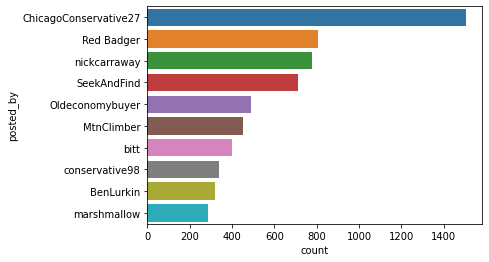

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    MtnClimber               216      1   
                       Red Badger                 2      1   
                       SeekAndFind              120      1   
                       bitt                       7      1   
apnews.com             Red Badger                 1      1   
                       SeekAndFind                3      1   
                       BenLurkin                  1      1   
                       Oldeconomybuyer          131      1   
                       marshmallow                3      1   
                       nickcarraway               3      1   
breitbart.com          Red Badger                 9      1   
                       bitt                       5      1   
                       BenLurkin                  1      1   
                       marshmallow                7      1   
                       ChicagoConservative27    800      1   
                       conservative98            51      1   
cnn.com                Red Badger                 1      1   
                       bitt                       1      1   
                       BenLurkin                 19      1   
                       Oldeconomybuyer            2      1   
                       nickcarraway               7      1   
                       ChicagoConservative27      7      1   
                       conservative98             1      1   
dailymail.co.uk        Red Badger                 7      1   
                       SeekAndFind                1      1   
                       bitt                       9      1   
                       BenLurkin                  1      1   
                       marshmallow                1      1   
                       nickcarraway               4      1   
                       conservative98             2      1   
foxnews.com            MtnClimber                 2      1   
                       Red Badger                 4      1   
                       SeekAndFind                3      1   
                       bitt                      12      1   
                       BenLurkin                 25      1   
                       Oldeconomybuyer            9      1   
                       nickcarraway               5      1   
                       ChicagoConservative27     72      1   
                       conservative98            33      1   
hotair.com             MtnClimber                 2      1   
                       Red Badger                 3      1   
                       SeekAndFind               85      1   
lifesitenews.com       bitt                       1      1   
                       marshmallow               59      1   
medicalxpress.com      Red Badger                 1      1   
                       Oldeconomybuyer            1      1   
                       nickcarraway               1      1   
msn.com                MtnClimber                 1      1   
                       Red Badger                 2      1   
                       SeekAndFind               16      1   
                       BenLurkin                  2      1   
                       Oldeconomybuyer           37      1   
                       nickcarraway               1      1   
                       ChicagoConservative27      2      1   
                       conservative98             1      1   
news.yahoo.com         MtnClimber                 1      1   
                       SeekAndFind                2      1   
                       BenLurkin                  1      1   
                       Oldeconomybuyer           34      1   
                       nickcarraway               7      1   
nypost.com             MtnClimber                 2      1   
                       Red Badger                 7      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"174 wins and 9 losses, A GREAT EVENING, and the Fake News Media, together with their partner in crime, the Democrats, are doing everything possible to play it down",2022-11-09 12:07:21,291.0
"Trump calls Desantis ""Desanctimonious""",2022-11-06 02:46:42,262.0
"Fetterman wins Pennsylvania Senate race, defeating Oz and flipping key state for Democrats",2022-11-09 11:26:03,257.0
What's Freepers opinion on blaming Trump for the midterm elections?,2022-11-11 00:12:17,228.0
Turn It Down Please: Here Are The Most Annoying Pop Songs Ever Made,2022-10-10 16:35:06,224.0
"Trump Launches Attack Blaming Mitch McConnell, Calls His Wife “Coco Chow”",2022-11-14 01:33:11,214.0
Post Your Tips for Saving Money on Food,2022-12-08 04:16:40,210.0
Warnock wins in Georgia,2022-12-07 05:28:53,199.0
"[LIVE THREAD] Biden speaks at event in D.C. (""Democracy speech"") - Youtube link",2022-11-03 00:12:09,186.0
